# <i class="fa-solid fa-dumbbell"></i> Exercises

Please fill the missing code pieces as indicated by the `...`. The imports are always provided at the top of the code chunks. This should give you a hint for which functions/classes to use.

## Exercise 1: Model Selection

Today we are working with the `California Housing dataset`, which you are already familiar with, as we previously used it while exploring resampling method.
This dataset is based on the 1990 U.S. Census and includes features describing California districts. 

1) Familiarize yourself with the data
    - What kind of features are in the dataset? What is the target?

In [ ]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target

2) Baseline model 
    - Create a baseline linear regression model using **all** features and evaluate the model through 5-fold cross validation, using R² as the performance metric
    - Print the individual and average R²

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Regression model
model = ...
scores = ...

# Print the results
print("R² scores from each fold:", scores)
print("Average R² score:", np.mean(scores))

3) Apply a forward stepwise selection to find a simpler suitable model.
    - Split the data into 80% training data and 20% testing data (print the shape to confirm it was sucessful)
    - Perform a forward stepwise selection with a linear regression model, 5-fold CV, R² score, and `parsimonious` feature selection (refer to [documentation](https://rasbt.github.io/mlxtend/api_subpackages/mlxtend.feature_selection/) for further information)
    - Print the best CV R² as well as the chosen features

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = ...

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

# Forward Sequential Feature Selector
sfs_forward = ...

sfs_forward.fit(...)

print(f">> Forward SFS:")
print(f"   Best CV R²      : {sfs_forward.k_score_:.3f}")
print(f"   Optimal # feats : {len(sfs_forward.k_feature_idx_)}")
print(f"   Feature names   : {sfs_forward.k_feature_names_}")

4) Evaluate the model on the test set

In [ ]:
selected_features = list(sfs_forward.k_feature_names_)

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train and evaluate
model.fit(...)
test_r2 = model.score(...)
print(f"Test R² for the sfs model: {test_r2:.4f}")

## Exercise 2: LASSO

Please implement a Lasso regression model similar to the Ridge model in the [Regularization](2_Regularization) section.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

# Data related processing
hitters = sm.datasets.get_rdataset("Hitters", "ISLR").data
hitters_subset = hitters[["Salary", "AtBat", "Runs","RBI", "CHits", "CAtBat", "CRuns", "CWalks", "Assists", "Hits", "HmRun", "Years", "Errors", "Walks"]].copy()
hitters_subset = hitters_subset.drop(columns=["CRuns", "CAtBat"]) # Remove highly correlated features (see previous session)
hitters_subset.dropna(inplace=True) # drop rows containing missing data

y = hitters_subset["Salary"]
X = hitters_subset.drop(columns=["Salary"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale predictors to mean=0 and std=1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# TODO: Implement Lasso 
...

## Exercise 3: GAMs (1)

Objective: Understand how the number of basis functions (df) and the polynomial degree (degree) affect the flexibility of a spline and the resulting fit in a Generalized Additive Model.

1. Use the diabetes dataset and focus on the relationship between `bmi` and `target`.
2. We want to test different combinations of parameters. For the dfs, please use 4, 6, 12. For the degree, please use 2 and 3 (quadratic and cubic).
3. Fit the GAMs for each parameter combination. The resulting models will be plotted automatically for visual comparison.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from statsmodels.gam.api import GLMGam, BSplines


# TODO: 1. Get bmi as x and the target as y
data = load_diabetes(as_frame=True)
x = ...
y = ...

# TODO: 2. Define possible parameters
df_values = ...
degree_values = ...

# TODO: 3. Plot partial effect for each combination of df and degree
fig, axes = plt.subplots(len(df_values), len(degree_values), figsize=(15, 10), sharey=True)

for i, df_val in enumerate(df_values):
    for j, deg_val in enumerate(degree_values):
        bs = BSplines(...)
        gam = GLMGam(...)
        res = gam.fit()

        res.plot_partial(0, cpr=True, ax=axes[i, j])
        axes[i, j].set_title(f'B-spline: df={df_val}, degree={deg_val}')
        axes[i, j].set_xlabel('BMI')
        axes[i, j].set_ylabel('Effect')

plt.tight_layout()
plt.show()

## Exercise 4: GAMs (2)

We now use the [wage](https://islp.readthedocs.io/en/latest/datasets/Wage.html) dataset, which contains income information for a group of workers, along with demographic and employment-related features such as age, education, marital status, and job class.

1) Explore the dataset
    - Which variables are numeric?
    - Which ones are categorical?

2) Fit a GAM predicting `wage` from `age`, `year`, `education`, `jobclass`, and `maritl`

Note: For categorical features we use a one-hot encoding with `pd.get_dummies()`

In [ ]:
import pandas as pd
from ISLP import load_data
from statsmodels.gam.api import GLMGam, BSplines

# Load data
Wage = load_data('Wage')

# Continuous features
smoooth_features = ...
X_spline = Wage[smoooth_features]

# Categorical features — one-hot encode
categoricals = ...
X_cat = pd.get_dummies(Wage[categoricals], drop_first=True)

# Outcome
y = ...

# Create BSpline basis
bs = BSplines(...)

# Fit GAM
gam = GLMGam(...)
res = gam.fit()

print(res.summary())

## Exercise 5: KNN

You will implement a K-Nearest Neighbours (KNN) classifier to predict whether a patient is likely to have malignant or benign breast cancer based on several features. The data is already loaded for you, but please have a look a the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) to quickly refresh you memory about the dataset.

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load the data
data = load_breast_cancer()
X, y = data.data, data.target

# Create a DataFrame for easier inspection and manipulation
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
df

Please implement the following:

1. Subset the dataframe to use `mean area`, `mean radius`, and `mean smoothness` as features (X), and `target` as the target (y)
2. Scale the predictors to mean 0 and variance 1
3. Split the data into a training and a testing set (70/30)
4. Train a kNN classifier with $k=5$
5. Evaluate the performance for the testing set. Please use the `accuracy_score()` as well as the `classification_report()` function.

In [ ]:
# TODO: 1. Select features and target
X = ...
y = ...

# TODO: 2. Scale the features
scaler = ...
X_scaled = ...

# TODO: 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(...)

# 4. Perform KNN classification
knn = KNeighborsClassifier(...)
knn.fit(...)

# TODO: 5. Get predictions
y_pred = knn.predict(...)

print("Accuracy:", accuracy_score(...))
print("\nClassification Report:\n", classification_report(...))

The classification model from the previous step has two main limitations:

1. It is trained and evaluated on a single data split
2. It uses a single $k$ even though we do not know if it is optimal

Please do the following:

1. Implement 5-fold cross validation
2. Train models for $k$ ranging from 1 to 200 and plot the mean accuracy over all folds

In [ ]:
from sklearn.model_selection import cross_val_score
import seaborn as sns
sns.set_theme(style="whitegrid")

k_values = range(1, 200)
mean_accuracies = []

# 5-fold cross-validation for different k values
for k in k_values:
    knn = KNeighborsClassifier(...)
    scores = cross_val_score(...)
    mean_accuracies.append(...)

# Plot
fig, ax = plt.subplots()

sns.lineplot(x=..., y=..., linestyle='-', ax=ax)
ax.set(xlabel=..., ylabel=..., title=...);

Discuss the results. How is the performance in general? Which $k$ would you chose?

## Exercise 6: LDA, QDA & Naïve Bayes

Once again, we will use the Iris dataset for classificationa analysis. Your task is to compare the performance of LDA, QDA, and Gaussian Naïve Bayes!

1. Load the `iris` dataset from `sklearn.datasets`. We will use only the first two features (sepal length and width)
2. `TODO:` Split the data into training and test sets ([use stratification!](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))
3. `TODO:` Fit LDA, QDA, and Naïve Bayes classifiers to the training data and orint the classification report for all models on the test data
4. Plot the decision boundaries for both models

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# 1. Load data
iris = load_iris()
X = iris.data[:, :2]
y = iris.target
target_names = iris.target_names

# 2. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(...)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 3. TODO: Fit a LDA model and print the classification report
lda = ...

print(classification_report(y_test, lda.predict(X_test)))

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# 3. TODO: Fit a QDA model and print the classification report
qda = ...

print(classification_report(y_test, qda.predict(X_test)))

In [ ]:
from sklearn.naive_bayes import GaussianNB

# 3. TODO: Fit a Gaussian Naive Bayes model and print the classification report
gnb = ...

print(classification_report(y_test, gnb.predict(X_test)))

Once you have trained all three models, you can simply run the following code to plot the decision boundaries:

In [ ]:
# 4. Plot the decision boundaries for all 3 classifiers

# Plotting function
def plot_decision_boundary(model, X, y, title, ax):
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.2)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=30)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')

# Create plots for all 3 classifiers
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
plot_decision_boundary(lda, X_train, y_train, "LDA Decision Boundary", axes[0])
plot_decision_boundary(qda, X_train, y_train, "QDA Decision Boundary", axes[1])
plot_decision_boundary(gnb, X_train, y_train, "Naïve Bayes Decision Boundary", axes[2])
plt.tight_layout()

## Exercise 7: SVC

For the SVC exercise we will use the `fmri` dataset from `seaborn`, which contains measurements of brain activity (`signal`) in two brain regions (`frontal` and `parietal`) under two event types (`stim` vs. `cue`).

In [ ]:
import seaborn as sns
df = sns.load_dataset("fmri")
df

We will try to answer a very simple research question:

> Can we distinguish between `cue` and `stim` events based on the fMRI signal in the `parietal` and `frontal` brain regions?

To do this, we need to turn the long‐format data into a classic “feature matrix” (one row = one sample, two columns = our two brain‐region signals) plus a corresponding label vector (cue/stim):

In [ ]:
df_wide = df.pivot_table(
    index=["subject","timepoint","event"],
    columns="region",
    values="signal"
).reset_index()
df_wide.columns.name = None

X = df_wide[["frontal","parietal"]] 
y = df_wide["event"].map({"cue":0,"stim":1})

print("\nFeatures:")
print(X)
print("\nTarget:")
print(y)

With the features and target in the correct form, please perform the following tasks:

1. Split the data into a train and test set
2. Scale the predictors to mean 0 and std 1
3. Fit a linear as well as a rbf SVC and **discuss the classification reports**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# 1. TODO: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(...)

# 2. TODO: Scale the features after splitting (important to avoid data leakage)
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(...)
X_test_sc  = scaler.transform(...)

# 3. TODO: Fit the SVC models and compare the classification reports
clf_lin = SVC(...)
clf_lin.fit(...)
y_pred_lin = clf_lin.predict(...)
print("Linear SVC\n", classification_report(...))

clf_rbf = SVC(...)
clf_rbf.fit(...)
y_pred_rbf = clf_rbf.predict(...)
print("RBF SVC\n", classification_report(...))

After fitting both models, you can run the code chunk below to plot the decision boundary:

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def plot_svc_decision_function(model, ax=None):
    """Plot the decision boundary for a trained 2D SVC model."""
    # Set up grid
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(*xlim, 100), np.linspace(*ylim, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    decision_values = model.decision_function(grid).reshape(xx.shape)
    ax.contour(xx, yy, decision_values, levels=[0], linestyles=['-'], colors='k')

# Plot
fig, ax = plt.subplots(1,2, figsize=(12, 6))

legend_elements = [
    Line2D([0], [0], marker='o', linestyle='None', markersize=8, label='Cue', markerfacecolor="#0173B2", markeredgecolor='None'),
    Line2D([0], [0], marker='o', linestyle='None', markersize=8, label='Stim', markerfacecolor="#DE8F05", markeredgecolor='None'),
    Line2D([0], [0], color='k', linestyle='-', label='Decision boundary')]

# Linear SVC
sns.scatterplot(x = X_train_sc[:, 0], y = X_train_sc[:, 1], hue = y_train.map({0:"cue",1:"stim"}), palette = ["#0173B2", "#DE8F05"], s = 60, ax = ax[0], legend=None)
ax[0].set(xlabel = "Frontal signal (scaled)", ylabel = "Parietal signal (scaled)", title  = "Linear SVC Decision Boundary")
plot_svc_decision_function(clf_lin, ax=ax[0])
ax[0].legend(handles=legend_elements, loc="upper left", handlelength=1)

# RBF SVC
sns.scatterplot(x = X_train_sc[:, 0], y = X_train_sc[:, 1], hue = y_train.map({0:"cue",1:"stim"}), palette = ["#0173B2", "#DE8F05"], s = 60, ax = ax[1], legend=None)
ax[1].set(xlabel = "Frontal signal (scaled)", ylabel = "Parietal signal (scaled)", title  = "RBF SVC Decision Boundary")
plot_svc_decision_function(clf_rbf, ax=ax[1])
ax[1].legend(handles=legend_elements, loc="upper left", handlelength=1);

Training a SVC on more complex datasets usually requires a parameter search to find the optimal hyperparameters. Please implement a grid search with the following options:

- Kernel:   rbf
- C:        np.logspace(-2,2,5)
- gamma:    np.logspace(-3,1,5)
- cv:       5-fold
- scoring:  accuracy

Print the optimal parameters and the corresponding accuracies for taining and testing.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    ...
}
grid = GridSearchCV(...)
grid.fit(...)

print("Best params:", grid.best_params_)
print("CV accuracy:", grid.best_score_)
print("Test accuracy:", grid.score(X_test_sc, y_test))

## Exercise 8: Trees

1. Inspect the data
    - How many features are there and what are they?
    - What is the target?

2. Split the data into a train and test set, and make sure the classes are equally distributed (`stratify=y`)

3. Fit the DecisionTreeClassifier(max_depth=3) and report train vs. test accuracy.

4. Tree inspection (discuss in group)
    - After fitting the model, the tree will be plotted automatically
    - What is the very first split (feature name and threshold)?
    - Which leaf nodes are pure, and which have mixed classes?

   preg  plas  pres  skin  insu  mass   pedi  age
0     6   148    72    35     0  33.6  0.627   50
1     1    85    66    29     0  26.6  0.351   31
2     8   183    64     0     0  23.3  0.672   32
3     1    89    66    23    94  28.1  0.167   21
4     0   137    40    35   168  43.1  2.288   33 

0    tested_positive
1    tested_negative
2    tested_positive
3    tested_negative
4    tested_positive
Name: class, dtype: category
Categories (2, object): ['tested_negative', 'tested_positive']

Train accuracy: 0.7635009310986964
Test accuracy:  0.7445887445887446


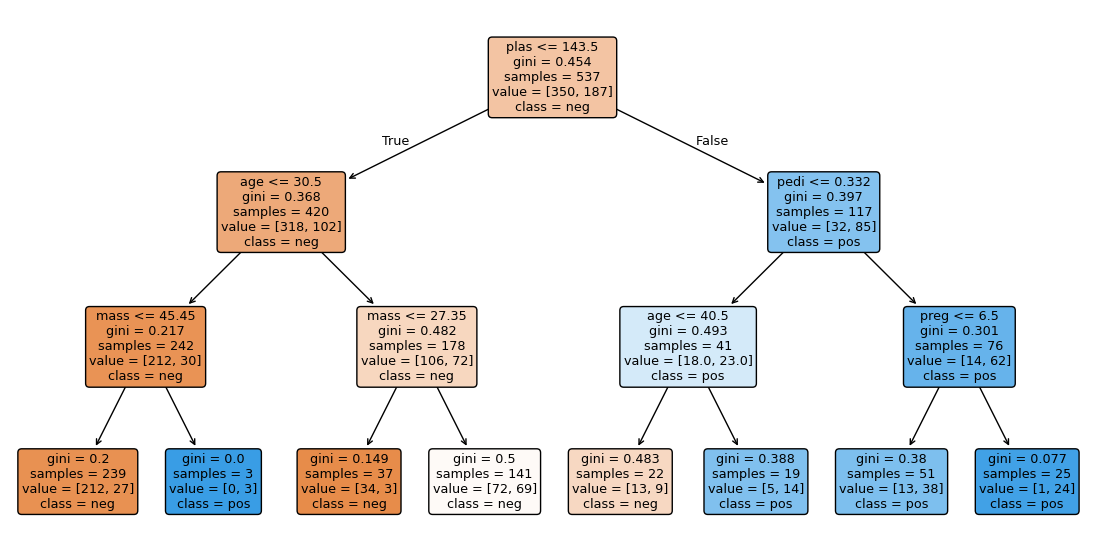

In [12]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1) Load and inspect data
diab = fetch_openml("diabetes", version=1, as_frame=True)
X = diab.data
y = diab.target

print(X.head(), "\n")
print(y.head())

# 2) Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# 3) Fit tree
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)

print("\nTrain accuracy:", accuracy_score(y_train, clf.predict(X_train)))
print("Test accuracy: ", accuracy_score(y_test,  clf.predict(X_test)))

# 5) Plot tree
plt.figure(figsize=(14,7))
plot_tree(clf, feature_names=X.columns, class_names=["neg","pos"], filled=True, rounded=True);

Let's see if we can improve the classification performance with a random forest classifier and hyperparameter tuning!

1. Set up the clasifier + a parameter grid for grid search with 5-fold CV
    - n_estimators: 50, 100, 200
    - max_depth: None, 10, 20
    - min_samples_split: 2, 5, 10
    - max_features: "sqrt", "log2", 0.5

2. Fit the model with the grid search

3. Print the best hyperparameters

4. Evaluate the best model on the test set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# 1) Set up Random Forest + parameter grid
rf = RandomForestClassifier(random_state=0)

param_grid = {
    'n_estimators':      [50, 100, 200],
    'max_depth':         [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features':      ['sqrt', 'log2', 0.5]
}

# 2) Fit on training data
grid = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid.fit(X_train, y_train)

# 3) Print best hyperparameters
print("Best parameters:", grid.best_params_)
print(f"CV accuracy: {grid.best_score_:.3f}")

# 4) Evaluate on the held‐out test set
best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test)

print(f"\nTest accuracy: {accuracy_score(y_test, y_pred):.3f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['neg','pos']))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 50}
CV accuracy: 0.773

Test accuracy: 0.788

Classification Report:
              precision    recall  f1-score   support

         neg       0.83      0.85      0.84       150
         pos       0.71      0.67      0.69        81

    accuracy                           0.79       231
   macro avg       0.77      0.76      0.76       231
weighted avg       0.79      0.79      0.79       231

